In [21]:
from numpy.random import random
from tqdm import tqdm
from matplotlib import pyplot as plt
%matplotlib inline

In [22]:
class Person:
    birth_rate = 0.2
    death_rate = 0.005
    
    def __init__(self, age: int = 0):
        self.age = age
        self.alive = True
            
    def birth(self):
        if self.alive and random() < self.birth_rate and self.age > 18:
            return Person()
        
    def ageing(self):
        if self.alive:
            self.age += 1
        
    def death(self):
        if self.alive and random() < self.death_rate:
            self.alive = False

In [23]:
class Society:
    
    def __init__(self, start_population: int):
        self.population = []
        for person in range(start_population):
            self.population.append(Person())
    
    def update(self):
        new_birth = []
        for person in self.population:
            
            child = person.birth()
            if child:
                new_birth.append(child)
            
            person.ageing()
            person.death()
            
        self.population.extend(new_birth)

In [24]:
soc = Society(1000)
years = 100
population = []
deadstock = []
for year in tqdm(range(years)):
    population.append(len([p for p in soc.population if p.alive]))
    deadstock.append(len([p for p in soc.population if not p.alive]))
    soc.update()

100%|██████████| 100/100 [00:06<00:00, 16.46it/s]


C:\Users\papse\AppData\Local\Temp\ipykernel_12480\3026064117.py:8: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


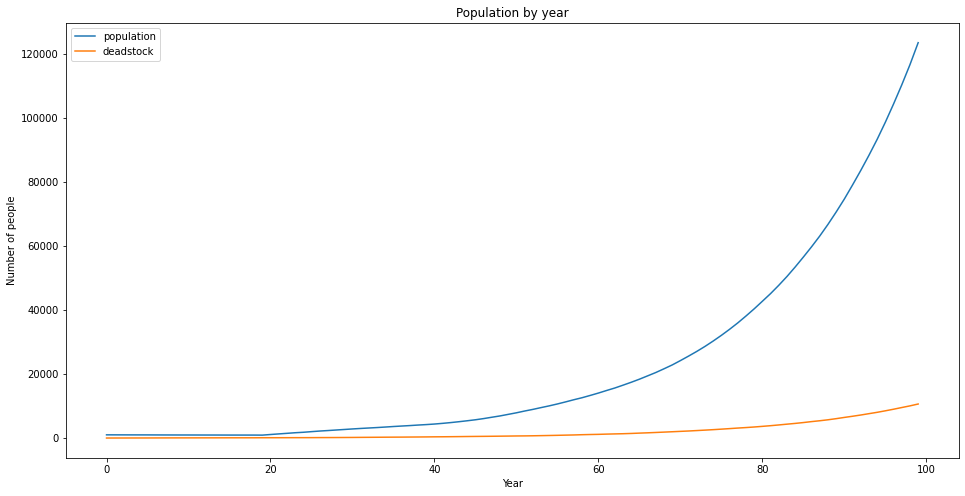

In [25]:
fig, axes = plt.subplots(figsize = [16,8])
axes.plot(range(years), population, label = 'population')
axes.plot(range(years), deadstock, label = 'deadstock')
axes.legend()
axes.set_xlabel('Year')
axes.set_ylabel('Number of people')
axes.set_title('Population by year')
fig.show()